In this notebook is reported a starting data exploration both on the development dataset and the evaluation one

# Configuraion

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
plt.rcParams["figure.figsize"] = (10, 6)

# Development dataset

In [38]:
df_dev = pd.read_csv('dataset/development.csv', index_col= 'ID', na_values = '-')
df_dev.head()

YEAR      LOC       SN      AT      AP      AH    AFDP    GTEP     TIT  \
ID                                                                           
0   2022  Austria  0903XTR  24.918  1006.8  55.697  3.3648  22.322  1071.5   
1   2022  Romania  0903XTR  14.332  1024.1  81.857  3.2767  20.049  1037.3   
2   2022   Sweden  0903XTR  11.548  1009.1  78.389  4.9142  28.616  1093.9   
3   2022  Finland  0903XTR  25.597  1003.0  77.744  3.2325  20.749  1062.1   
4   2022  Estonia  0903XTR  13.484  1011.1  96.477  4.1968  24.230  1086.1   

       TAT     TEY     CDP      NOX        CO  
ID                                             
0   550.03  119.83  11.171      NaN   1.07640  
1   533.70  110.05  10.692  102.010  10.19600  
2   539.43  147.19  12.979      NaN   0.78407  
3   549.95  112.79  10.624   52.225   1.61530  
4   550.08  133.71  11.921   71.915   1.40710

In [6]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24488 entries, 0 to 24487
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    24488 non-null  int64  
 1   LOC     24488 non-null  object 
 2   SN      24488 non-null  object 
 3   AT      24488 non-null  float64
 4   AP      24488 non-null  float64
 5   AH      24488 non-null  float64
 6   AFDP    24488 non-null  float64
 7   GTEP    24488 non-null  float64
 8   TIT     24488 non-null  float64
 9   TAT     24488 non-null  float64
 10  TEY     24488 non-null  float64
 11  CDP     24488 non-null  float64
 12  NOX     12220 non-null  float64
 13  CO      24488 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.8+ MB


Only the column NOX has missing values, all the other present complete entries

In [7]:
df_dev.describe()

YEAR            AT            AP            AH          AFDP  \
count  24488.000000  24488.000000  24488.000000  24488.000000  24488.000000   
mean    2020.021562     17.732311   1013.040249     77.851576      3.926046   
std        1.417453      7.472854      6.472126     14.528496      0.775096   
min     2018.000000     -6.234800    986.160000     24.085000      2.087400   
25%     2019.000000     11.754750   1008.800000     68.164000      3.354175   
50%     2020.000000     17.838000   1012.600000     80.494000      3.937450   
75%     2021.000000     23.715500   1016.900000     89.392250      4.377350   
max     2022.000000     37.103000   1036.500000    100.200000      7.554900   

               GTEP           TIT           TAT           TEY           CDP  \
count  24488.000000  24488.000000  24488.000000  24488.000000  24488.000000   
mean      25.547051   1081.393270    546.180856    133.444970     12.056017   
std        4.188980     17.511092      6.829290     15.606517      1.087296   
min       17.698000   1001.300000    511.040000    100.020000      9.875400   
25%       23.080000   1071.600000    544.810000    124.220000     11.423000   
50%       25.092500   1085.900000    549.880000    133.730000     11.963000   
75%       28.958500   1096.700000    550.040000    143.790000     12.824000   
max       40.716000   1100.900000    550.610000    179.500000     15.159000   

                NOX            CO  
count  12220.000000  24488.000000  
mean      65.241146      2.379069  
std       11.480075      2.270383  
min       29.063000      0.000388  
25%       57.205000      1.186750  
50%       63.822500      1.719450  
75%       71.406250      2.866625  
max      119.900000     44.103000

### LOC

In [11]:
df_dev['LOC'].value_counts().index

Index(['Portugal', 'Germany', 'Malta', 'Denmark', 'Greece', 'Slovenia',
       'Lithuania', 'Czech Republic', 'Sweden', 'Slovakia', 'Romania', 'Spain',
       'Croatia', 'Italy', 'Belgium', 'Latvia', 'Republic of Cyprus',
       'Bulgaria', 'Hungary', 'Ireland', 'France', 'Austria', 'Finland',
       'Netherlands', 'Luxembourg', 'Estonia', 'Poland'],
      dtype='object')

In [25]:
df_dev['LOC'].value_counts()

Portugal              965
Germany               960
Malta                 955
Denmark               954
Greece                947
Slovenia              938
Lithuania             938
Czech Republic        937
Sweden                936
Slovakia              935
Romania               925
Spain                 924
Croatia               920
Italy                 910
Belgium               909
Latvia                905
Republic of Cyprus    890
Bulgaria              888
Hungary               878
Ireland               876
France                872
Austria               869
Finland               867
Netherlands           855
Luxembourg            853
Estonia               845
Poland                837
Name: LOC, dtype: int64

In [80]:
round((df_dev['LOC'].value_counts() / len(df_dev)).mean(), 3)

0.037

All the turbines are based in Europe and they are uniformely distributed across all the countries. Indeed we have a mean about 0.037% of the total turbine number in each country and it is exaclty the value of 1/27, where 27 is the number of represented countries.

### SN

In [26]:
df_dev['SN'].value_counts()

0903XTR    24488
Name: SN, dtype: int64

The columns SN, which indicates the turbine model, contains only one value so when may remove that columns before passing the data to the model.

### YEAR

As can be observed by the describe method, the obseravations have been taken between the 2018 and the 2022. 

In [30]:
df_dev['YEAR'].value_counts()

2021    5142
2022    4950
2018    4877
2019    4760
2020    4759
Name: YEAR, dtype: int64

In [31]:
round((df_dev['YEAR'].value_counts() / len(df_dev)).mean(), 3)

0.2

As for the LOC, column we can say that the datasets is enough balanced with respect to the YEAR column.

### ID

The ID column contains increasing indexes, so it seems to be unnecessary for the analysis.

In [41]:
df_dev.reset_index()[['ID','YEAR']].corr()

ID    YEAR
ID    1.0000 -0.0113
YEAR -0.0113  1.0000

There is no relation between ID and YEAR => the record are not reported sorted by YEAR.

### Correlation among features

<AxesSubplot:>

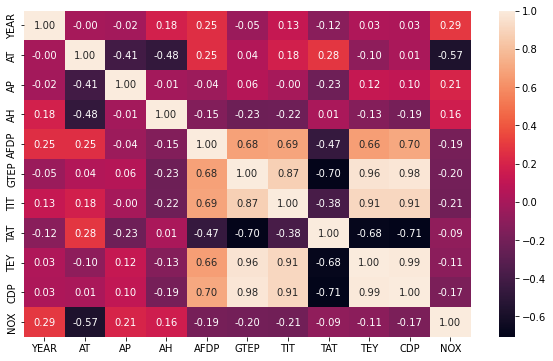

In [56]:
sns.heatmap(df_dev.iloc[:,:-1].corr(), annot = True, fmt = '.2f')

The features AFDP, GTEP, TIT, TAT, TEY and CDP seem to correlated one to another. 

In particular we have positive correlation between AFDP, GTEP, TIT, TEY, CDP, while TAT is characterized with a negative linear relationship.

Another significative correlation can be seen between the AT with the AP, AH as one can expects, but also with NOX column.

In [72]:
df_dev.corr()['CO']

YEAR   -0.177655
AT     -0.173731
AP      0.066065
AH      0.112168
AFDP   -0.445265
GTEP   -0.516484
TIT    -0.702058
TAT     0.056917
TEY    -0.565702
CDP    -0.547465
NOX     0.343427
CO      1.000000
Name: CO, dtype: float64

In [71]:
df_dev.corr()['CO'].loc[abs(df_dev.corr()['CO']) > 0.5].sort_values()

TIT    -0.702058
TEY    -0.565702
CDP    -0.547465
GTEP   -0.516484
CO      1.000000
Name: CO, dtype: float64

The cell above allows to individuate the features with the highest correlation, negative in that case, with the CO emission value. We may start from these 5 features.

# Evaluation dataset

Now we check if the characteristics of the evaluation set are the same of the development one

In [39]:
df_val = pd.read_csv('dataset/evaluation.csv', index_col= 'ID', na_values = '-')
df_val.head()

YEAR                 LOC       SN      AT      AP       AH    AFDP  \
ID                                                                          
24488  2022  Republic of Cyprus  0903XTR  24.276  1013.3   67.643  3.9119   
24489  2022             Estonia  0903XTR  10.100  1015.9  100.150  3.5681   
24490  2020             Estonia  0903XTR  26.283  1015.1   58.595  4.9541   
24491  2018             Denmark  0903XTR   7.811  1015.9   73.624  2.5919   
24492  2021              Latvia  0903XTR  25.138  1010.3   82.853  3.6168   

         GTEP     TIT     TAT     TEY     CDP     NOX  
ID                                                     
24488  26.056  1093.8  549.73  134.44  12.163     NaN  
24489  19.167  1049.8  545.97  110.74  10.415     NaN  
24490  25.910  1092.9  549.89  133.21  12.271     NaN  
24491  21.351  1036.2  543.81  107.77  10.355     NaN  
24492  20.117  1057.8  550.01  109.80  10.500  51.366

In [73]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 24488 to 36732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    12245 non-null  int64  
 1   LOC     12245 non-null  object 
 2   SN      12245 non-null  object 
 3   AT      12245 non-null  float64
 4   AP      12245 non-null  float64
 5   AH      12245 non-null  float64
 6   AFDP    12245 non-null  float64
 7   GTEP    12245 non-null  float64
 8   TIT     12245 non-null  float64
 9   TAT     12245 non-null  float64
 10  TEY     12245 non-null  float64
 11  CDP     12245 non-null  float64
 12  NOX     6182 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.3+ MB


In [74]:
df_val.describe()

YEAR            AT            AP            AH          AFDP  \
count  12245.000000  12245.000000  12245.000000  12245.000000  12245.000000   
mean    2019.999673     17.673560   1013.129993     77.897892      3.924462   
std        1.421931      7.396537      6.445599     14.326681      0.771641   
min     2018.000000     -5.895600    985.850000     27.504000      2.144100   
25%     2019.000000     11.843000   1008.900000     68.300000      3.358500   
50%     2020.000000     17.743000   1012.700000     80.422000      3.938400   
75%     2021.000000     23.584000   1017.100000     89.355000      4.374700   
max     2022.000000     35.822000   1036.600000    100.200000      7.610600   

               GTEP           TIT           TAT           TEY           CDP  \
count  12245.000000  12245.000000  12245.000000  12245.000000  12245.000000   
mean      25.597299   1081.497705    546.113843    133.629260     12.069541   
std        4.209848     17.587331      6.868486     15.642752      1.091776   
min       17.719000   1000.800000    512.450000    100.030000      9.851800   
25%       23.214000   1072.000000    544.570000    124.930000     11.463000   
50%       25.119000   1085.900000    549.870000    133.740000     11.968000   
75%       29.256000   1097.800000    550.040000    144.550000     12.918000   
max       38.362000   1100.800000    550.570000    177.880000     15.083000   

               NOX  
count  6182.000000  
mean     65.261535  
std      11.800257  
min      27.765000  
25%      57.193250  
50%      63.697500  
75%      71.508500  
max     119.910000

### LOC

In [107]:
countries_turbine = df_val['LOC'].value_counts()

In [108]:
print(countries_turbine.index, len(countries_turbine.index))

Index(['Germany', 'Slovenia', 'Estonia', 'Greece', 'Netherlands', 'Italy',
       'Bulgaria', 'Portugal', 'Luxembourg', 'Sweden', 'Latvia', 'Lithuania',
       'Romania', 'Belgium', 'Spain', 'Croatia', 'Hungary', 'Poland',
       'Czech Republic', 'Denmark', 'Austria', 'Slovakia', 'Ireland', 'Malta',
       'France', 'Finland', 'Republic of Cyprus'],
      dtype='object') 27


In [109]:
round((countries_turbine / len(df_val)).mean(), 3)

0.037

In [87]:
len(set(df_dev['LOC']) | set(df_val['LOC']))

27

All the countries in the development df are also in the validation one.

### SN

In [89]:
df_val['SN'].value_counts()

0903XTR    12245
Name: SN, dtype: int64

Same model of the development set.

### YEAR

In [90]:
df_val['YEAR'].value_counts()

2018    2507
2021    2486
2022    2461
2019    2398
2020    2393
Name: YEAR, dtype: int64

Same years and similar distribution

### ID

In [116]:
df_val.reset_index()[['ID','YEAR']].corr()

ID      YEAR
ID    1.000000  0.005865
YEAR  0.005865  1.000000

As in the developement dataset the ID is not correlated with the YEAR

### Correlation among features

<AxesSubplot:>

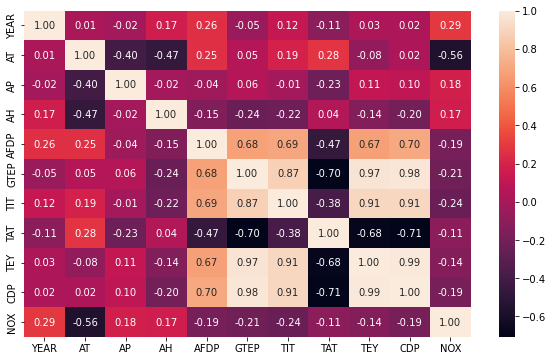

In [117]:
sns.heatmap(df_val.corr(), annot = True, fmt = '.2f') 

The same relationshiops that we have in the developement set.

# Conclusion

In [118]:
#TODO descrivere feature per feature cosa si può assumere da questa prima analisi.